#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [17]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [21]:
# Построение модели нейронной сети
model = Sequential()

# Входной слой (с количеством нейронов, равным числу признаков)
model.add(Dense(128, input_dim=x_train.shape[1]))
model.add(Activation('relu'))
model.add(BatchNormalization())  # Нормализация

# Скрытые слои
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))  # Dropout для предотвращения переобучения

model.add(Dense(32))
model.add(Activation('relu'))

# Выходной слой (3 нейрона для 3 классов)
model.add(Dense(3))
model.add(Activation('softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [22]:
# Обучение модели
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=2)

Epoch 1/60
5/5 - 3s - 512ms/step - accuracy: 0.3681 - loss: 1.1633 - val_accuracy: 0.3750 - val_loss: 1.9067
Epoch 2/60
5/5 - 0s - 19ms/step - accuracy: 0.6111 - loss: 0.7773 - val_accuracy: 0.2500 - val_loss: 4.8504
Epoch 3/60
5/5 - 0s - 18ms/step - accuracy: 0.6458 - loss: 0.7257 - val_accuracy: 0.2500 - val_loss: 5.5033
Epoch 4/60
5/5 - 0s - 28ms/step - accuracy: 0.6667 - loss: 0.6209 - val_accuracy: 0.2500 - val_loss: 4.9654
Epoch 5/60
5/5 - 0s - 36ms/step - accuracy: 0.6597 - loss: 0.6198 - val_accuracy: 0.2500 - val_loss: 4.4206
Epoch 6/60
5/5 - 0s - 28ms/step - accuracy: 0.7153 - loss: 0.6041 - val_accuracy: 0.2500 - val_loss: 3.8657
Epoch 7/60
5/5 - 0s - 19ms/step - accuracy: 0.7222 - loss: 0.5733 - val_accuracy: 0.2500 - val_loss: 3.2789
Epoch 8/60
5/5 - 0s - 19ms/step - accuracy: 0.7014 - loss: 0.5941 - val_accuracy: 0.2500 - val_loss: 2.6883
Epoch 9/60
5/5 - 0s - 19ms/step - accuracy: 0.7431 - loss: 0.5472 - val_accuracy: 0.2500 - val_loss: 2.1194
Epoch 10/60
5/5 - 0s - 21ms

In [23]:
# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовых данных: {test_acc * 100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9444 - loss: 0.1016
Точность на тестовых данных: 94.44%


In [ ]:
# Вывод сводки модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,707 (147.30 KB)

 Trainable params: 12,483 (48.76 KB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 24,968 (97.54 KB)

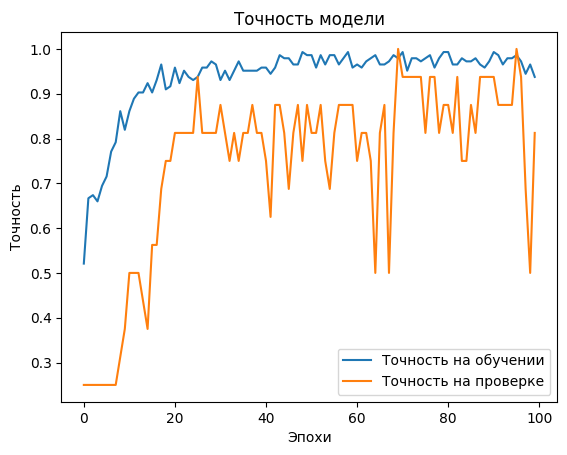

In [ ]:
# График точности
plt.plot(history.history['accuracy'], label='Точность на обучении')
plt.plot(history.history['val_accuracy'], label='Точность на проверке')
plt.title('Точность модели')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()